In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

import mlflow


In [219]:
df = pd.read_csv('../datasets/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [220]:
df.shape

(10000, 6)

In [221]:
df.duplicated().sum()

127

In [222]:
df.drop_duplicates(inplace=True)
df.shape

(9873, 6)

In [223]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [224]:
df.skew(numeric_only=True)

Hours Studied                      -0.003348
Previous Scores                     0.005581
Sleep Hours                        -0.041350
Sample Question Papers Practiced   -0.034893
Performance Index                  -0.000412
dtype: float64

In [225]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [226]:
nums = ['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']
cats=['Extracurricular Activities']
nums

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

<Axes: ylabel='Performance Index'>

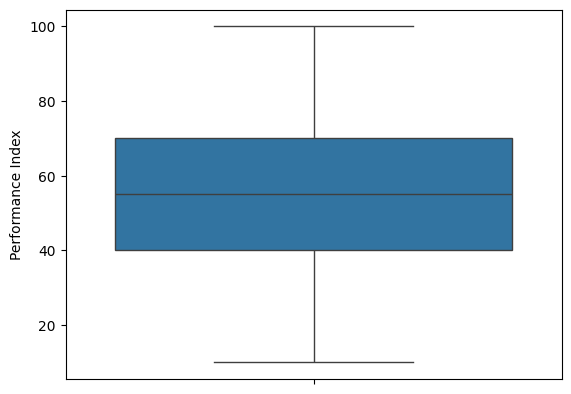

In [227]:
sns.boxplot(y = df['Performance Index'])

In [228]:
for col in nums:
    fig=px.histogram(df,x=col,width=900)
    fig.show()

In [229]:
for col in cats:
    fig = px.bar(df, x=df[col].value_counts().index, y=df[col].value_counts().values, labels={'x': col, 'y': 'Count'},width=600,height=400)
    fig.show()   

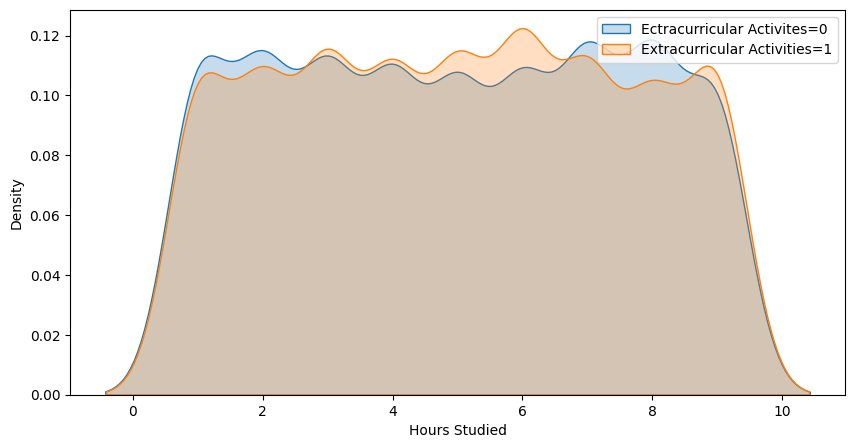

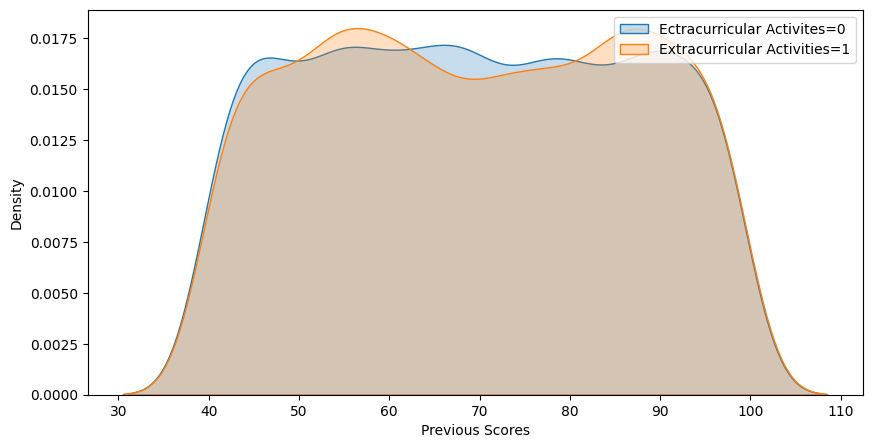

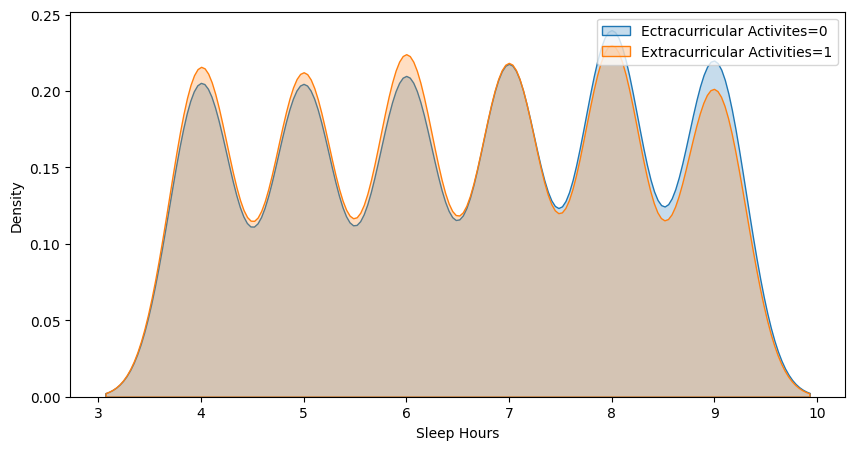

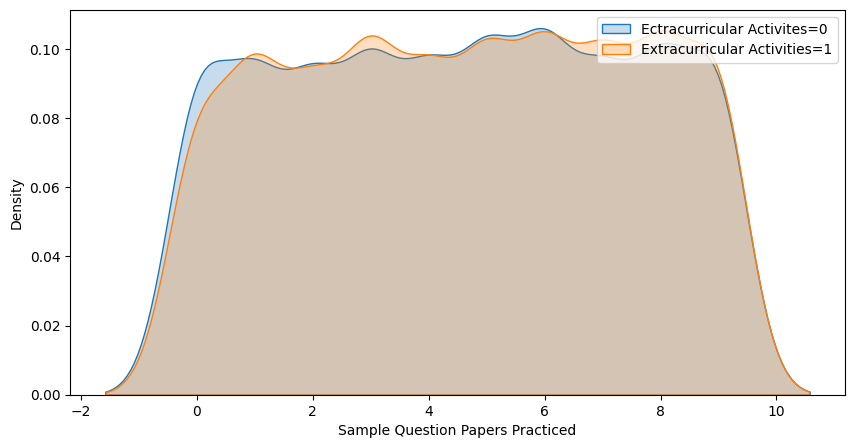

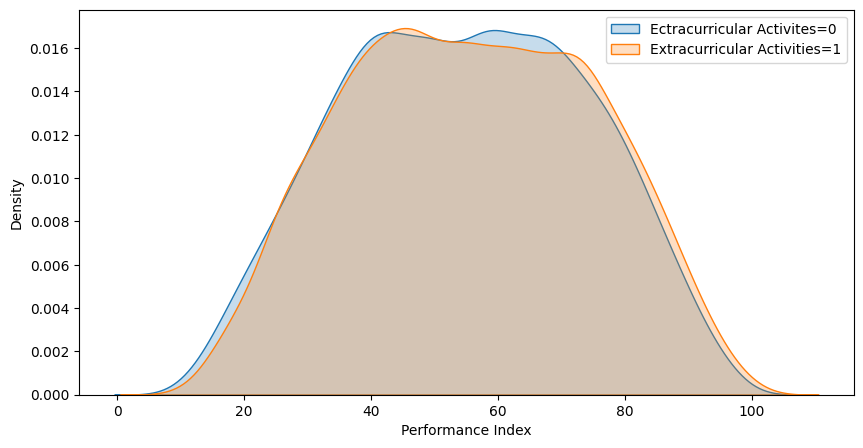

In [230]:
for col in nums:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[col][df['Extracurricular Activities']=='No'], fill=True,label='Ectracurricular Activites=0')
    sns.kdeplot(df[col][df['Extracurricular Activities']=='Yes'], fill=True,label='Extracurricular Activities=1')
    plt.legend()
    plt.show()

In [231]:
nums

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [232]:
cats

['Extracurricular Activities']

In [233]:

df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

df['Extracurricular Activities'].unique()

array([1, 0], dtype=int64)

In [234]:
fig3=px.scatter(df,x=df['Hours Studied'],y=df['Previous Scores'],color=df['Extracurricular Activities'],width=900)
fig3.show()


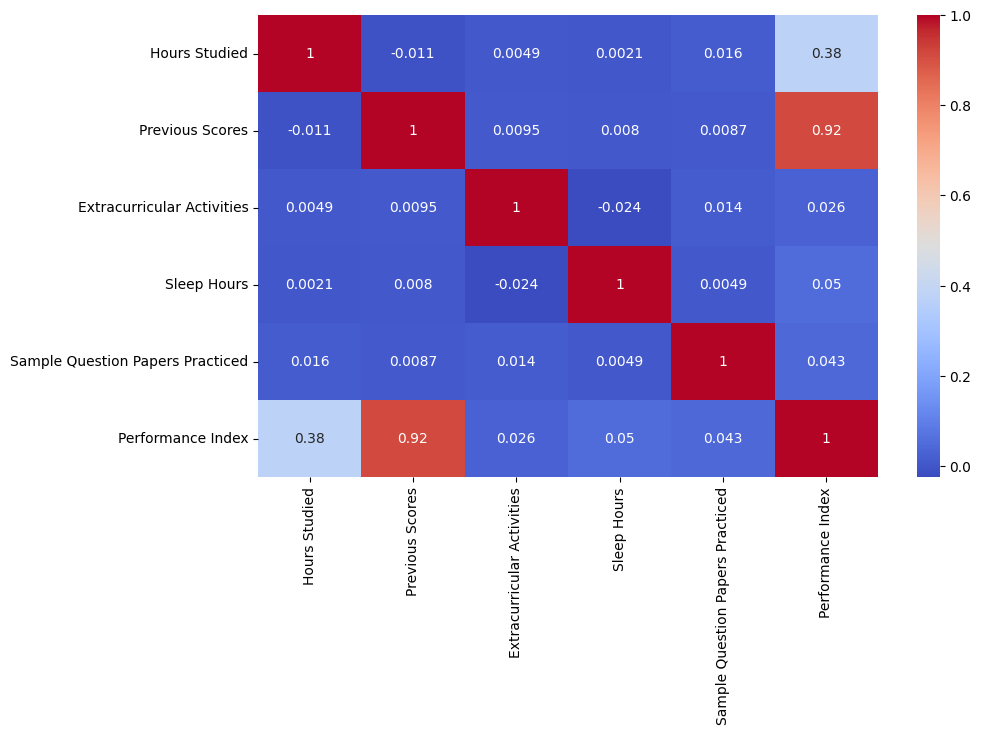

In [235]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')   
plt.show()

In [236]:
x=df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
y=df[['Performance Index']]

In [237]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [238]:
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [239]:
pipeline = ColumnTransformer([("defaulter",OneHotEncoder(drop='first'),[]),("sc",StandardScaler(),[0,1,2,3])],remainder='passthrough')
pipeline.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('defaulter', OneHotEncoder(drop='first'), []),
                                ('sc', StandardScaler(), [0, 1, 2, 3])])

In [240]:
x2 = pipeline.transform(x)
pd.DataFrame(x2,columns=pipeline.get_feature_names_out()).head()

,sc__Hours Studied,sc__Previous Scores,sc__Sleep Hours,sc__Sample Question Papers Practiced
0,0.775566,1.706168,1.454025,-1.249715
1,-0.383205,0.724912,-1.491315,-0.900925
2,1.161822,-1.064438,0.275889,-0.900925
3,0.003052,-1.006717,-0.902247,-0.900925
4,0.775566,0.320865,0.864957,0.145444


In [241]:
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=3)
print(x.shape,xtr.shape,xts.shape)
print(y.shape,ytr.shape,yts.shape)

(9873, 4) (7898, 4) (1975, 4)
(9873, 1) (7898, 1) (1975, 1)


In [242]:
model = LinearRegression()
# train the model with train data
model.fit(xtr,ytr)

LinearRegression()

In [243]:
person = [[7,75,8,5]]
person = pipeline.transform(person)
model.predict(person)

C:\Users\Vikram k m\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[67.40359132]])

In [244]:
yts

,Performance Index
5624,78.0
194,54.0
2182,83.0
640,40.0
949,38.0
...,...
7956,74.0
1631,33.0
6248,20.0
9938,48.0


In [250]:
ypred = model.predict(xts)

# np.set_printoptions(threshold=np.inf)
# print(predic)
df2 = {}
predic_str = np.array2string(ypred, precision=2, separator=',', suppress_small=True)
df2['actual'] = yts
df2['predic'] = predic_str
df2

{'actual':       Performance Index
 5624               78.0
 194                54.0
 2182               83.0
 640                40.0
 949                38.0
 ...                 ...
 7956               74.0
 1631               33.0
 6248               20.0
 9938               48.0
 3852               85.0
 
 [1975 rows x 1 columns],
 'predic': '[[77.16],\n [56.24],\n [81.84],\n [39.52],\n [37.65],\n [19.16],\n [57.04],\n [34.02],\n [38.14],\n [56.52],\n [22.52],\n [41.77],\n [64.46],\n [66.47],\n [65.82],\n [53.38],\n [32.59],\n [76.57],\n [42.05],\n [74.83],\n [65.76],\n [83.58],\n [63.02],\n [35.24],\n [76.4 ],\n [26.19],\n [65.34],\n [31.56],\n [62.09],\n [72.11],\n [61.68],\n [58.94],\n [14.76],\n [32.81],\n [76.14],\n [89.16],\n [32.33],\n [82.19],\n [76.49],\n [87.48],\n [34.83],\n [63.76],\n [69.1 ],\n [24.88],\n [70.9 ],\n [63.49],\n [61.7 ],\n [67.03],\n [33.14],\n [38.47],\n [71.46],\n [42.07],\n [68.44],\n [12.34],\n [30.29],\n [33.06],\n [58.77],\n [56.26],\n [39.69],\n 

In [254]:
yts.iloc[:,0]

5624    78.0
194     54.0
2182    83.0
640     40.0
949     38.0
        ... 
7956    74.0
1631    33.0
6248    20.0
9938    48.0
3852    85.0
Name: Performance Index, Length: 1975, dtype: float64

In [248]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(yts, ypred)))
print('R2 Score: ', metrics.r2_score(yts, ypred))

RMSE: 2.0966751882864223
R2 Score:  0.9879607876260785
